# Konsep Perceptron

## Daftar Isi
1. Pengenalan Perceptron
2. Komponen Perceptron
3. Algoritma Pembelajaran
4. Implementasi
5. Limitasi Perceptron
6. Latihan

## 1. Pengenalan Perceptron

Perceptron adalah algoritma pembelajaran terawasi (supervised learning) yang paling sederhana, diperkenalkan oleh Frank Rosenblatt pada tahun 1957. Perceptron merupakan building block dasar dari neural network.

Karakteristik utama:
- Single-layer neural network
- Binary classifier
- Online learning algorithm
- Basis dari neural network modern

Mari kita mulai dengan mengimport library yang diperlukan:

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Set random seed untuk reproducibility
np.random.seed(42)

## 2. Komponen Perceptron

Perceptron terdiri dari beberapa komponen utama:

1. **Input Layer (x)**: Menerima fitur input
2. **Weights (w)**: Bobot untuk setiap input
3. **Bias (b)**: Nilai konstanta yang ditambahkan
4. **Activation Function**: Step function (fungsi tangga)

Formula Perceptron:
\[ y = f(\sum_{i=1}^{n} w_i x_i + b) \]

dimana f adalah fungsi aktivasi:
\[ f(x) = \begin{cases} 
1 & \text{if } x \geq 0 \\
0 & \text{if } x < 0
\end{cases} \]

Mari kita visualisasikan struktur Perceptron:

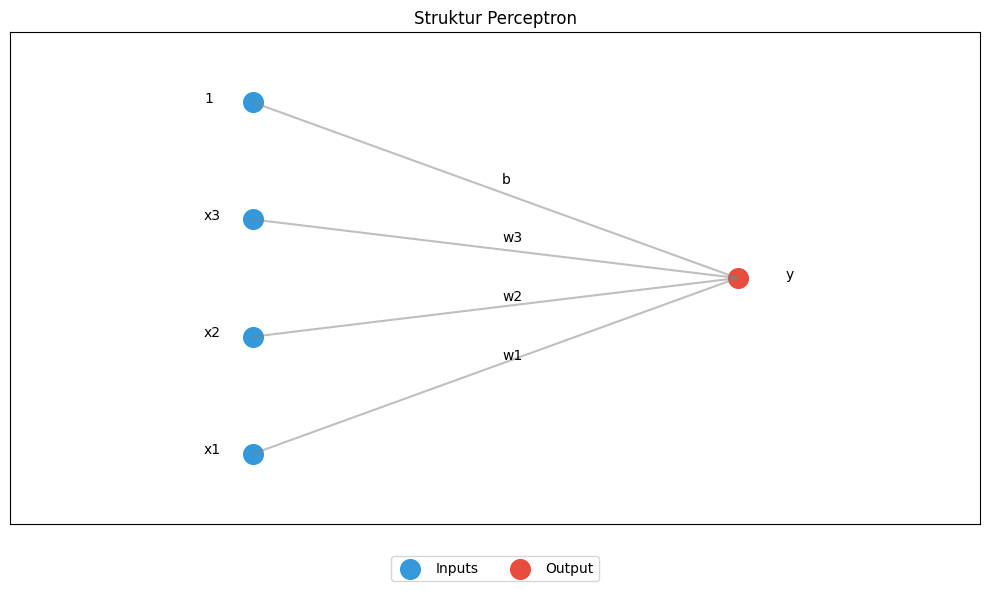

In [54]:
def plot_perceptron_structure():
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Input nodes positions
    input_pos = np.array([[0, i/3] for i in range(4)])  # 3 inputs + 1 bias
    output_pos = np.array([1, 0.5])
    
    # Plot nodes
    ax.scatter(input_pos[:,0], input_pos[:,1], c='#3498db', s=200, label='Inputs')
    ax.scatter(output_pos[0], output_pos[1], c='#e74c3c', s=200, label='Output')
    
    # Plot connections
    for i, pos in enumerate(input_pos):
        ax.plot([pos[0], output_pos[0]], [pos[1], output_pos[1]], 'gray', alpha=0.5)
        mid_point = (pos + output_pos) / 2
        if i < 3:  # For regular inputs
            ax.annotate(f'w{i+1}', (mid_point[0], mid_point[1]), xytext=(5, 5), 
                       textcoords='offset points')
        else:  # For bias
            ax.annotate('b', (mid_point[0], mid_point[1]), xytext=(5, 5),
                       textcoords='offset points')
    
    # Labels
    for i in range(3):
        ax.annotate(f'x{i+1}', (input_pos[i,0]-0.1, input_pos[i,1]))
    ax.annotate('1', (input_pos[3,0]-0.1, input_pos[3,1]))  # bias input
    ax.annotate('y', (output_pos[0]+0.1, output_pos[1]))
    
    ax.set_xlim([-0.5, 1.5])
    ax.set_ylim([-0.2, 1.2])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
    plt.title('Struktur Perceptron')
    plt.tight_layout()
    return fig

plot_perceptron_structure()
plt.show()

## 3. Algoritma Pembelajaran

Algoritma pembelajaran Perceptron adalah sebagai berikut:

1. Inisialisasi weight dan bias dengan nilai random atau nol
2. Untuk setiap data training:
   - Hitung prediksi menggunakan fungsi aktivasi
   - Bandingkan dengan nilai target
   - Update weight dan bias jika prediksi salah

Formula update:
- w = w + η(y_target - y_pred)x
- b = b + η(y_target - y_pred)

dimana η (eta) adalah learning rate

Mari kita implementasikan Perceptron untuk masalah klasifikasi sederhana:

AND Gate Results:
Input		Predicted	Expected
----------------------------------------
[0 0]	0		0
[0 1]	0		0
[1 0]	0		0
[1 1]	1		1


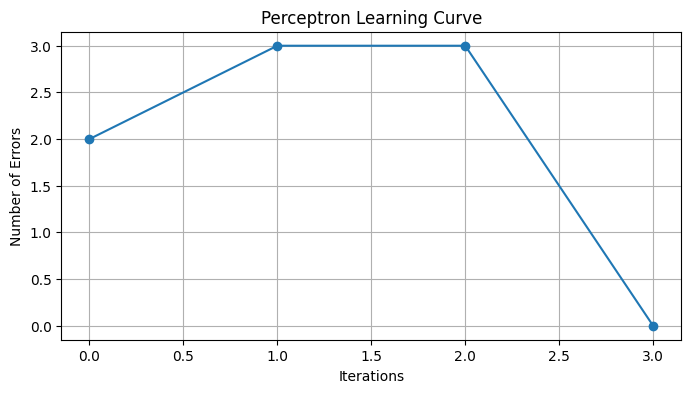

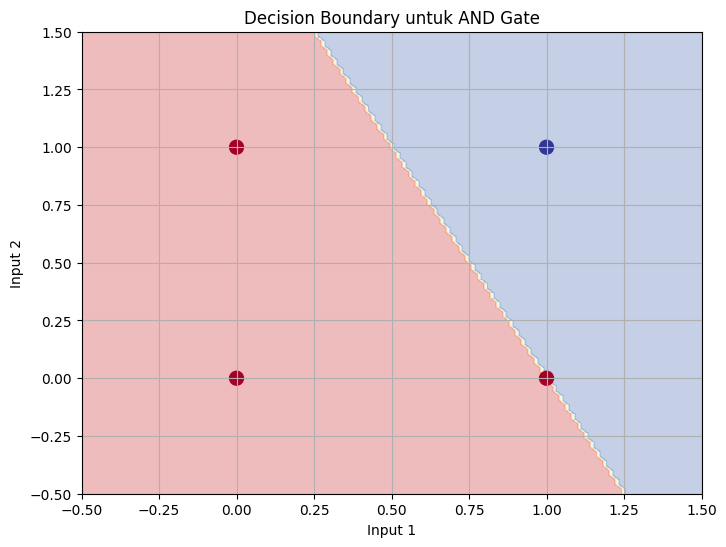

In [55]:
class Perceptron:
    def __init__(self, learning_rate=0.1, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.errors_ = []
    
    def step_function(self, x):
        return np.where(x >= 0, 1, 0)
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iterations):
            errors = 0
            
            # For each sample
            for xi, target in zip(X, y):
                # Calculate prediction
                prediction = self.step_function(np.dot(xi, self.weights) + self.bias)
                
                # Calculate error
                error = target - prediction
                
                # Update weights and bias
                self.weights += self.learning_rate * error * xi
                self.bias += self.learning_rate * error
                
                errors += int(error != 0)
            
            self.errors_.append(errors)
            
            # If no errors, stop training
            if errors == 0:
                break
    
    def predict(self, X):
        return self.step_function(np.dot(X, self.weights) + self.bias)

# Generate sample data for AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])  # AND gate output

# Create and train perceptron
perceptron = Perceptron(learning_rate=0.1, n_iterations=100)
perceptron.fit(X, y)

# Print results
print("AND Gate Results:")
print("Input\t\tPredicted\tExpected")
print("-" * 40)
for i in range(len(X)):
    pred = perceptron.predict([X[i]])
    print(f"{X[i]}\t{pred[0]}\t\t{y[i]}")

# Plot learning curve
plt.figure(figsize=(8, 4))
plt.plot(range(len(perceptron.errors_)), perceptron.errors_, marker='o')
plt.title('Perceptron Learning Curve')
plt.xlabel('Iterations')
plt.ylabel('Number of Errors')
plt.grid(True)
plt.show()

# Visualize decision boundary
def plot_decision_boundary():
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Predict for each point in the mesh
    Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap='RdYlBu', alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', s=100)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.grid(True)
    plt.title('Decision Boundary untuk AND Gate')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.show()

plot_decision_boundary()

## 4. Limitasi Perceptron

Perceptron memiliki beberapa keterbatasan penting:

1. **Hanya untuk Klasifikasi Linear**
   - Perceptron hanya dapat memisahkan data yang linear separable
   - Tidak dapat menyelesaikan masalah XOR

2. **Binary Classification**
   - Hanya dapat mengklasifikasikan dua kelas
   - Untuk multi-class classification membutuhkan modifikasi

Mari kita visualisasikan kasus XOR yang tidak dapat diselesaikan oleh Perceptron:

XOR Gate Results:
Input		Predicted	Expected
----------------------------------------
[0 0]	1		0
[0 1]	1		1
[1 0]	0		1
[1 1]	0		0


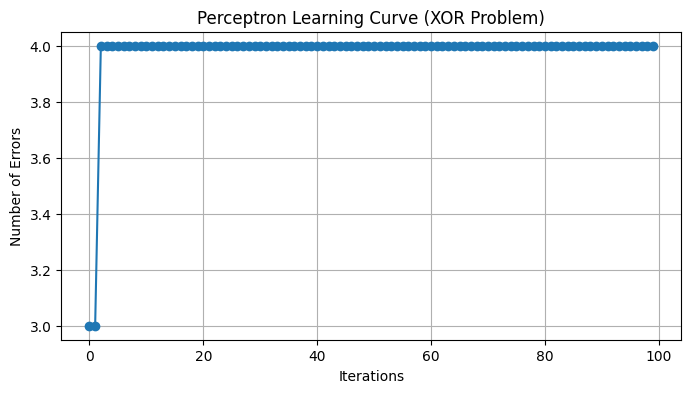

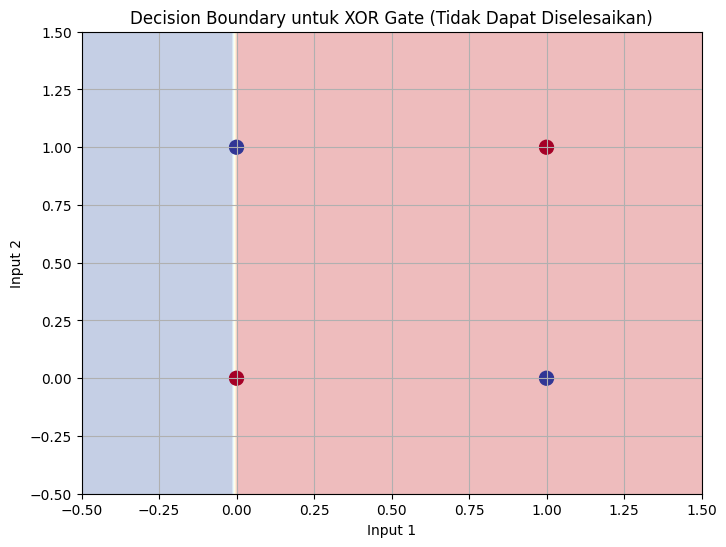

In [56]:
# Data XOR
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

# Train perceptron on XOR data
perceptron_xor = Perceptron(learning_rate=0.1, n_iterations=100)
perceptron_xor.fit(X_xor, y_xor)

print("XOR Gate Results:")
print("Input\t\tPredicted\tExpected")
print("-" * 40)
for i in range(len(X_xor)):
    pred = perceptron_xor.predict([X_xor[i]])
    print(f"{X_xor[i]}\t{pred[0]}\t\t{y_xor[i]}")

# Plot learning curve for XOR
plt.figure(figsize=(8, 4))
plt.plot(range(len(perceptron_xor.errors_)), perceptron_xor.errors_, marker='o')
plt.title('Perceptron Learning Curve (XOR Problem)')
plt.xlabel('Iterations')
plt.ylabel('Number of Errors')
plt.grid(True)
plt.show()

# Visualize decision boundary for XOR
def plot_xor_decision_boundary():
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    Z = perceptron_xor.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap='RdYlBu', alpha=0.3)
    plt.scatter(X_xor[:, 0], X_xor[:, 1], c=y_xor, cmap='RdYlBu', s=100)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.grid(True)
    plt.title('Decision Boundary untuk XOR Gate (Tidak Dapat Diselesaikan)')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.show()

plot_xor_decision_boundary()

## 5. Latihan

1. **Implementasi OR Gate**
   - Modifikasi kode di atas untuk mengimplementasikan gerbang logika OR
   - Truth table OR:
     * 0 OR 0 = 0
     * 0 OR 1 = 1
     * 1 OR 0 = 1
     * 1 OR 1 = 1

2. **Eksperimen dengan Learning Rate**
   - Coba berbagai nilai learning rate (0.01, 0.1, 0.5, 1.0)
   - Amati pengaruhnya terhadap kecepatan konvergensi
   - Plot learning curve untuk setiap learning rate

3. **Implementasi NAND Gate**
   - Implementasikan gerbang logika NAND
   - Truth table NAND:
     * 0 NAND 0 = 1
     * 0 NAND 1 = 1
     * 1 NAND 0 = 1
     * 1 NAND 1 = 0

4. **Visualisasi Weights**
   - Tambahkan visualisasi perubahan weights selama training
   - Plot weights vs iterations

## Kesimpulan

1. Perceptron adalah building block dasar neural network
2. Dapat menyelesaikan masalah klasifikasi linear
3. Memiliki limitasi pada masalah non-linear (seperti XOR)
4. Menjadi dasar pengembangan neural network yang lebih kompleks

## Referensi

1. Rosenblatt, F. (1958). The perceptron: A probabilistic model for information storage and organization in the brain
2. Minsky, M., & Papert, S. (1969). Perceptrons: An introduction to computational geometry